# Lab 4: Working with 'real' data
Lab done by: Lexie Peterson  
Partner: Kun Lee

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
import pandas as pd
from scipy import stats
import h5py
from scipy.optimize import curve_fit as cv

In [2]:
hf = h5py.File('gammaray_lab4.h5', 'r')
data = np.array(hf.get('data'))

In [3]:
def binPlot(dataX, dataY, numBins, start, end):
    npDataX = np.array(dataX[start:end])
    npDataY = np.array(dataY[start:end])
    start = start
    location = start
    finish = end
    binDataX = np.empty(numBins)
    binDataY = np.empty(numBins)

    binsArrX = np.array_split(npDataX, numBins)
    binsArrY = np.array_split(npDataY, numBins)
    
    index = 0
    for arr in binsArrX:
        binDataX[index] = np.average(arr)
        index += 1
        
    index = 0
    for arr in binsArrY:
        binDataY[index] = np.average(arr)
        index += 1
        
    return [binDataX, binDataY]

## Problem 1
In this problem we are looking at the data from a gamma-ray satellite orbiting in low Earth orbit. It takes a reading of the number of particles detected every 100 milliseconds, and is in an approximately 90 minute orbit. While it is looking for gamma-ray bursts, virtually all of the particles detected are background cosmic rays.

In [4]:
#splitting the variables into individual arrays
time        = data[0]
solar_phase = data[1]
longitude   = data[2]
counts      = data[3]

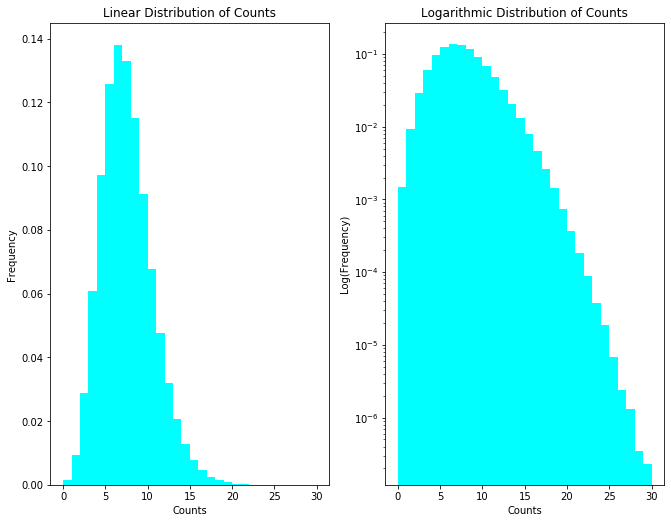

In [5]:
#plotting the distribution of cosmic ray counts
fig,ax = plt.subplots(1,2)                    
fig.set_size_inches(11,8.5)

ax[0].hist(counts,bins=30, color='cyan', density=True)
ax[0].set_xlabel("Counts")
ax[0].set_ylabel("Frequency")
ax[0].set_title("Linear Distribution of Counts")

ax[1].set_xlabel("Counts")
ax[1].set_ylabel("Log(Frequency)")
ax[1].set_title("Logarithmic Distribution of Counts")
ax[1].set_yscale("log")
ax[1].hist(counts, bins=30, color='cyan', density=True);

The left plot is a linear plot of our distribution while the right is a logarithmic plot of the background distribution, plotted so that we can get a better sense of how the tails are acting. The distribution of the cosmic-ray counts looks to be a poisson distibution. This makes sense since the signal is discrete, we detect a cosmic-ray or we don't, and we are detecting a number of counts per a time period. The time period in this instance is 100 milliseconds and the amount of rays per 100 milliseconds is around 7 (where the peak of the distribution appears). It would be nice to work simply with this, but the added dimensionallity of this problem (time, solar phase, Earth longitude) the distribution is not constant with time. We can see this as I continue to explore the data through plots.

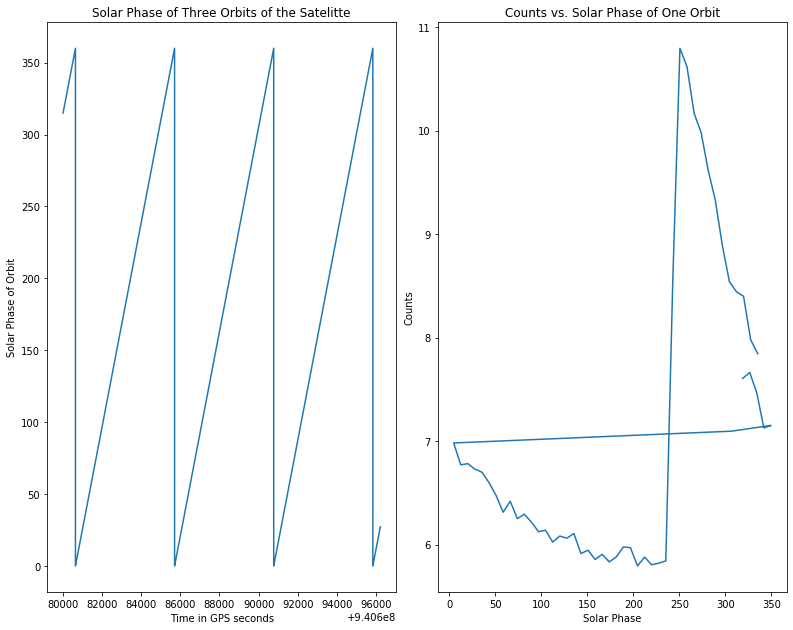

In [6]:
one_orbit = (90 * 60 * 10) #How much data points is taken in one_orbit
bindata1 = binPlot(solar_phase, counts, 50, 0, one_orbit)

fig,ax = plt.subplots(1,2)                    
fig.set_size_inches(11,8.5)                   

fig.tight_layout();
ax[0].plot(time[0:one_orbit*3], solar_phase[0:one_orbit*3])
ax[0].set_xlabel("Time in GPS seconds")
ax[0].set_ylabel("Solar Phase of Orbit")
ax[0].set_title("Solar Phase of Three Orbits of the Satelitte")
ax[1].plot(bindata1[0], bindata1[1])
ax[1].set_xlabel("Solar Phase")
ax[1].set_ylabel("Counts")
ax[1].set_title("Counts vs. Solar Phase of One Orbit");

The first graph, the one on the left, shows how the solar phase changes over time. As expected, since in the satelitte's frame the sun is moving in a circular orbit, it is a simple cycle increasing linearly from 0 to 360. The interesting part of the solar phase comes from plotting the phase versus counts (right graph above). First and formost most important features to note, is that the graph starts plottig when the phase is around 300, so when the phase reaches 360 and thus zero, the plot seems to jump to the right. So, this straight, horizontal line can be essential discarded as it is just a unwanted by-product of where in the phase our data started. Next important feature to note, is the spike in counts when the solar phase is around 250 and then the seemingly exponential drop off in counts. Although not shown, this is a repeative feature. Everytime when the solar pahse is around 250 it takes a sharp increase then exponential decays. I am unsure of the physics causing the spike and decay, but it is a sure sign our signal is being contaminated since it is changing with the solar phase.

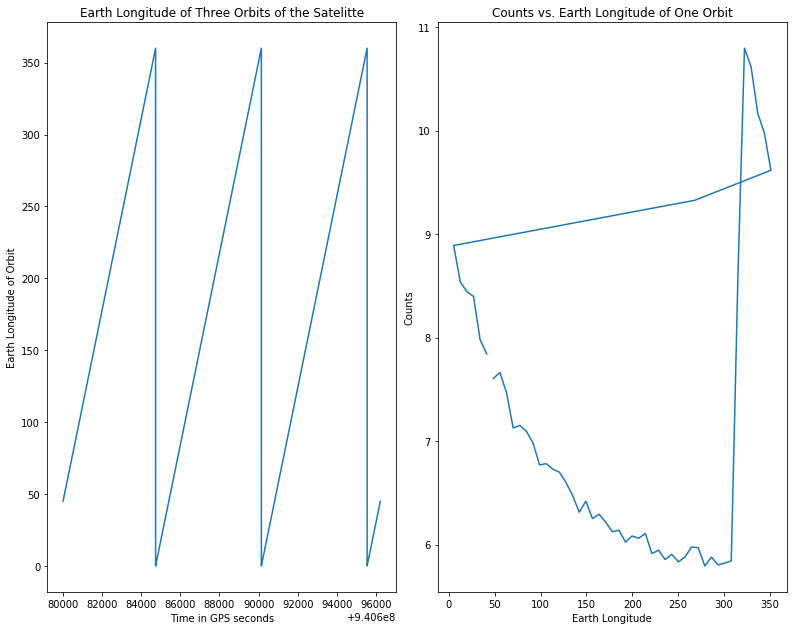

In [7]:
bindata2 = binPlot(longitude, counts, 50, 0,one_orbit)

fig,ax = plt.subplots(1,2)                    
fig.set_size_inches(11,8.5)                   

fig.tight_layout();
ax[0].plot(time[0:one_orbit*3], longitude[0:one_orbit*3])
ax[0].set_xlabel("Time in GPS seconds")
ax[0].set_ylabel("Earth Longitude of Orbit")
ax[0].set_title("Earth Longitude of Three Orbits of the Satelitte")
ax[1].plot(bindata2[0], bindata2[1])
ax[1].set_xlabel("Earth Longitude")
ax[1].set_ylabel("Counts")
ax[1].set_title("Counts vs. Earth Longitude of One Orbit");

The first graph, the one on the left, shows how the longitudinal position of the satelitte changes over time. As expected, since the satelitte is moving in a circular orbit around Earth, it is a simple cycle increasing linearly from 0 to 360. This graph is plotted to show the cyclic nature of the orbit. Similar the solar phase versus counts, the longitude versus counts graph (above right plot) starts plotting at a none-zero degree, causing the plot to jump to the right when it reaches 360. So, this straight, horizontal line can be essential discarded as it is again just a unwanted by-product of where longitudinally our data started. Also interesting, similar to the phase plot, is the spike in counts when the longitude is around 300 and then the seemingly exponential drop off in counts.  I am unsure of the physics causing the spike and decay, but once again it is a sure sign our signal is being contaminated since it is changing with the longitudinally.

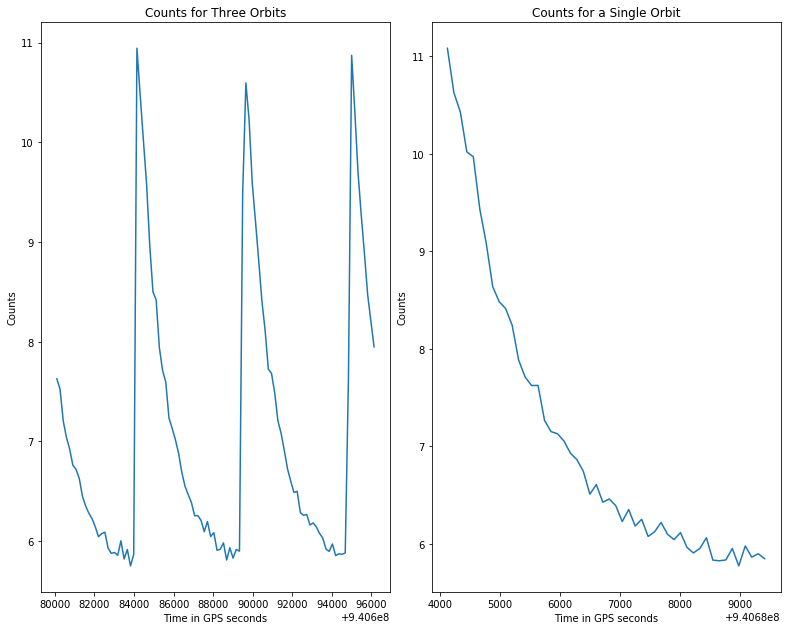

In [8]:
bindata3 = binPlot(time, counts, 50, 40500, 40500 + one_orbit)
bindata4 = binPlot(time, counts, 100, 0,one_orbit*3)

fig,ax = plt.subplots(1,2)                    
fig.set_size_inches(11,8.5)                   

fig.tight_layout()
ax[0].plot(bindata4[0], bindata4[1])
ax[0].set_xlabel("Time in GPS seconds")
ax[0].set_ylabel("Counts")
ax[0].set_title("Counts for Three Orbits")

ax[1].plot(bindata3[0], bindata3[1])
ax[1].set_xlabel("Time in GPS seconds")
ax[1].set_ylabel("Counts")
ax[1].set_title('Counts for a Single Orbit');

Both plots above show how the number of counts changing with time. The left plot shows changes over the first three orbits, while the right plot shows a chunk of time equal to one orbit but starts at the peak in counts not somewhere in the middle of the decay. Similar to the graphs of solar phase and Earth longitude, the counts follow the cyclic pattern of time. The counts peak around 11 counts, decay to around 6 counts, then spike back up to around 11 counts. This will be useful for us to redefine our background distribution so that it includes this exponential time dependence. To do this, we can cut the data into chunks similar to the right-hand graph, sum all these chunks, then average them to get general shape for how the counts change.

Text(0, 0.5, 'Counts')

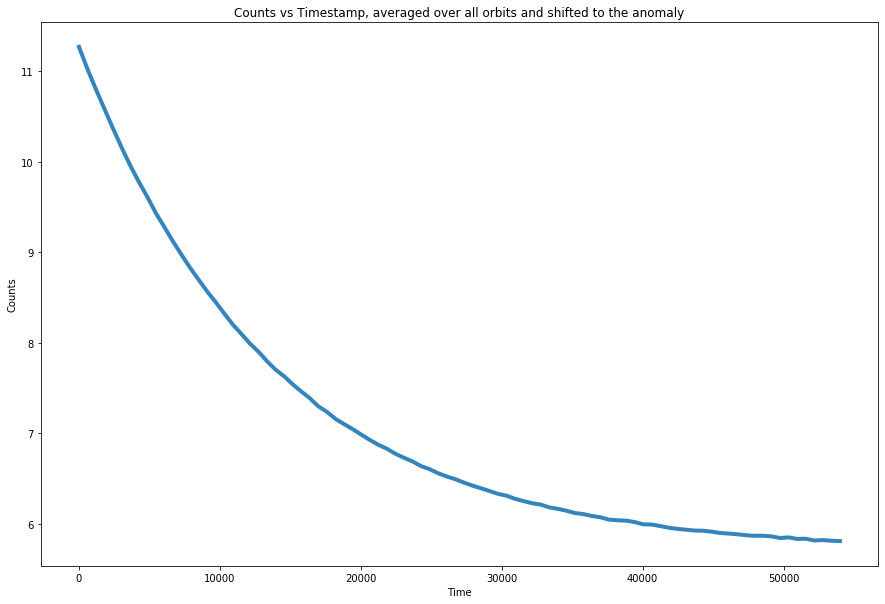

In [9]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)
size = 90
total_orbits = 0
average_counts = np.zeros(size)
anomaly_location = 40500 #index where the first jump occurs

while total_orbits < (round(len(counts) / one_orbit) - 1):
    [orbit_x, orbit_y] = binPlot(time, counts, size, (total_orbits*one_orbit)+anomaly_location, 
                                 ((total_orbits + 1)*one_orbit) + anomaly_location)
    average_counts += (orbit_y)
    total_orbits += 1
    
average_counts /= total_orbits

ax.plot(np.linspace(0, one_orbit, average_counts.size), average_counts, linewidth = 4, alpha = 0.9)
ax.set_title("Counts vs Timestamp, averaged over all orbits and shifted to the anomaly")
ax.set_xlabel("Time")
ax.set_ylabel("Counts")

The graph above is the result of breaking the data into chunks starting from the first spike, the anomaly, then ending right before the next spike. As predicted in earlier graphs, the change in counts does seem to follow an exponential decay. So the next step will be to fit a line to our data. An exponential decay will follow the form of: $ f(x) = ae^{-bx} + c $.

In [10]:
def expon_func(x, a, b, c):
    return a*np.exp(-b*x)+c

p_opt, pcov = cv(expon_func, np.linspace(0, one_orbit, average_counts.size), average_counts, p0=(4, 0.00002, 5))

p_opt

array([5.56987054e+00, 7.31677610e-05, 5.69830999e+00])

From fitting our curve, our time dependence is now defined by this exponential function:  
$ f(t) = 5.569e^{7.316\times 10^{-5}((t + 40500)mod 54000)} + 5.698 $  
The added 40500 is the anomaly offset while 54000 is the amount of data points contained in one orbit.
Now that we have a model, we need to check how accurate this model is by comparing it with the data. We can do this by finding the coefficient of determination, of the "R-Squared" value, which is the proportion (ranging from 0-1) of the variance in the data that is predictable by our model. The closer R-squared is to 1, the better our model is.

In [11]:
def r_squared(y_expected, y_actual):
    y_bar = sum(y_actual) / y_actual.size
    ss_tot = sum((y_expected - y_bar)**2)
    ss_res = sum((y_actual - y_expected)**2)
    return 1 - (ss_res / ss_tot)

x_model = np.linspace(0, one_orbit, average_counts.size)
y_model = expon_func(x_model, p_opt[0], p_opt[1], p_opt[2])

r = r_squared(y_model, average_counts)
r

0.9999892342096155

Our model turned out to have an R-squared value of 0.999989, which is close to one, and thus a rather decent model. we can thus conclude we have a workable model, but that isn't the end of the story. We started with a poisson distribution for our counts. We still have a poisson distribution, it is just that due to the time dependence the mean of that poisson will change with the model we have just created. Since our mean changes with time, the significance of descovery of a signal will also change. In order for us to distinguish between cosmic-rays and gamma-rays at different times, it will be helpful to plot how '5$\sigma$' changes with time.

Text(0, 0.5, 'Counts')

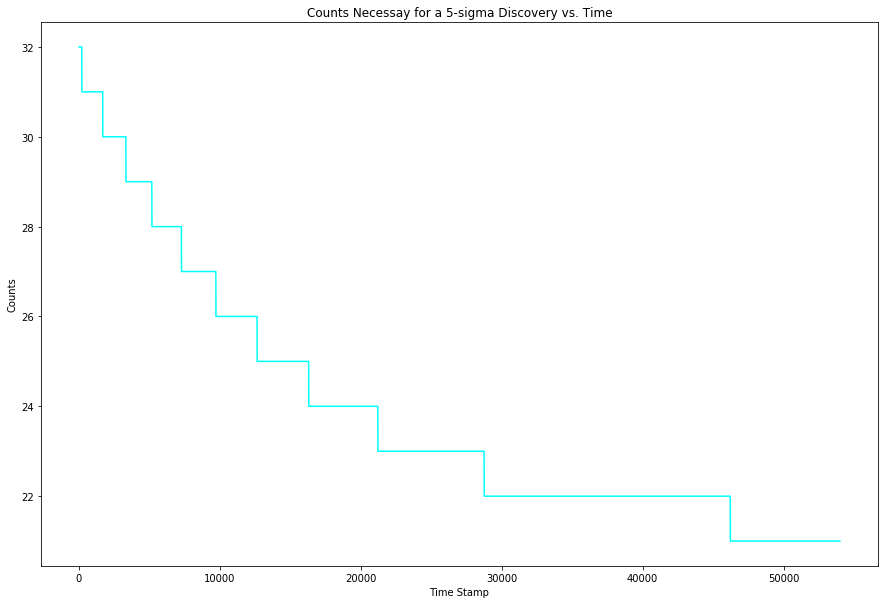

In [12]:
fiveSigmaProb = stats.norm.cdf(5, loc=0, scale=1)

times = []
counts = []

for time in range(0, one_orbit, 1):
    times.append(time)
    mean = expon_func(time, *p_opt)
    fiveSigmaSignal = stats.poisson.ppf(fiveSigmaProb, mu=mean)
    counts.append(fiveSigmaSignal)
    
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)

ax.plot(times, counts, color='cyan')
ax.set_title("Counts Necessay for a 5-sigma Discovery vs. Time")
ax.set_xlabel("Time Stamp")
ax.set_ylabel("Counts")

This last plot shows us that at the peak, just after the spike in cosmic-ray counts vs. times, the gamma-ray counts required for a 5$\sigma$ discovery is 32. On the other hand, after the cosmic-ray counts experience their decay, the gamma-ray counts required is around 21 counts to be considered a discovery. 

## Problem 2
In this problem we are going to look at a stack of telescope images (again simulated). There are ten images and the goal is to find the faintest stars. As always, I will first start by exploring the data I am given.


In [13]:
images = h5py.File('images.h5', 'r')
image1 = np.array(images.get('image1'))
image_stack = np.array(images.get('imagestack'))
images.close()

In [14]:
intensities = []
for image in range(10):
    intensity = []
    for x in range(200):
        for y in range(200):
            intensity.append(image_stack[x,y,image])
    intensities.append(intensity)

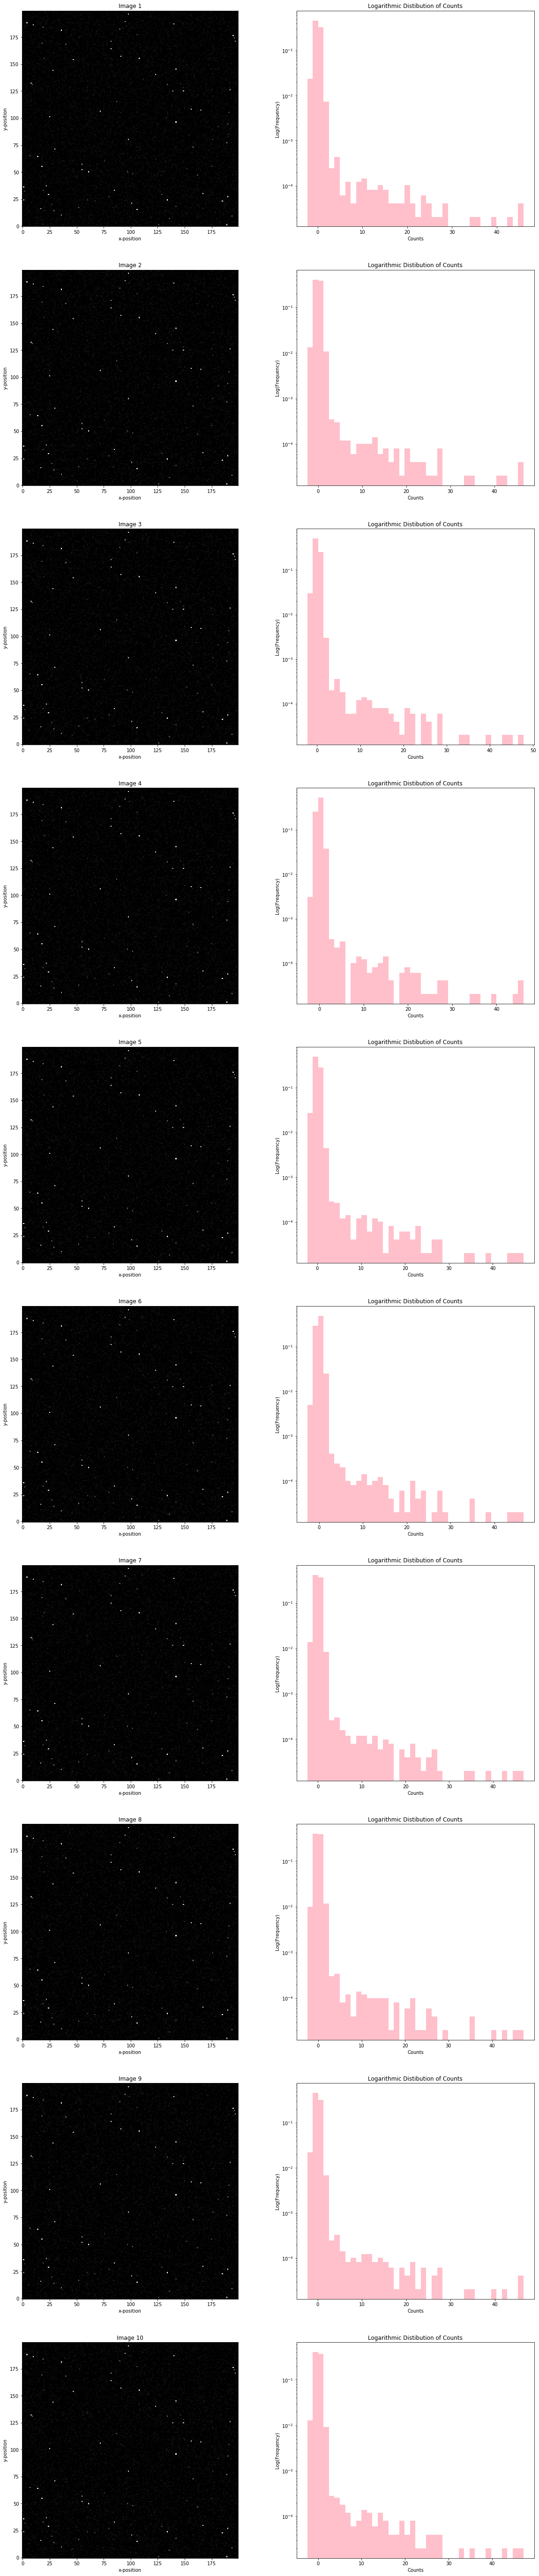

In [15]:
fig, ax = plt.subplots(10, 2)
fig.set_size_inches(20,100)
for image in range(10):
    title = "Image " + str(image + 1)
    ax[image,0].imshow(image_stack[:,:,image],cmap=plt.cm.gray, vmin=0, vmax=20, origin='bottom')
    ax[image,0].set_xlabel('x-position')
    ax[image,0].set_ylabel('y-position')
    ax[image,0].set_title(title)
    ax[image,1].hist(intensities[image], density=True, bins=40, color='pink')
    ax[image,1].set_ylabel("Log(Frequency)")
    ax[image,1].set_xlabel("Counts")
    ax[image,1].set_title("Logarithmic Distibution of Counts")
    ax[image,1].set_yscale('log')

For each image in our data set, I have plotted the counts of each pixel on the left-hand plot showing us the position of stars, while the right-hand plot is a logarithmic distribution of the counts, showing us what are the most common counts. It is hard to tell the differences between images using the left-hand column of graphs, but comparing the distributions of each image shows us there is change from one to the next. In general, we see the greatest frequency of counts to be from around -3 to positive 3. Any pixel with counts in this range is unlikely to be a dim star and is probably due to the bias (counts from the low-level constant voltage placed on each pixel) of the CCD (assuming these images haven't been bias subtracted, without a header, I cannot be sure). The frequency of counts above 3 seems to fluctuate from image to image but the general shape is consistant. This might be due to the change in seeing (how the atmosphere from telescope to object messes with the light) from one image to the next or perhaps an object with a changing light curve. Also note the brightest stars will have the highest number of counts and will appear as more distinct white dots on the plotted images.  

Now that I have explored the data a little, I want to be able to come up with a background distribution that will allow me to find the dimmest stars within the image. I will start this by creating an average image to eliminate some of the fluctuation that is unwanted (this fluctuation would be important for finding transients, however), and I will chop off some of the bias induced counts.

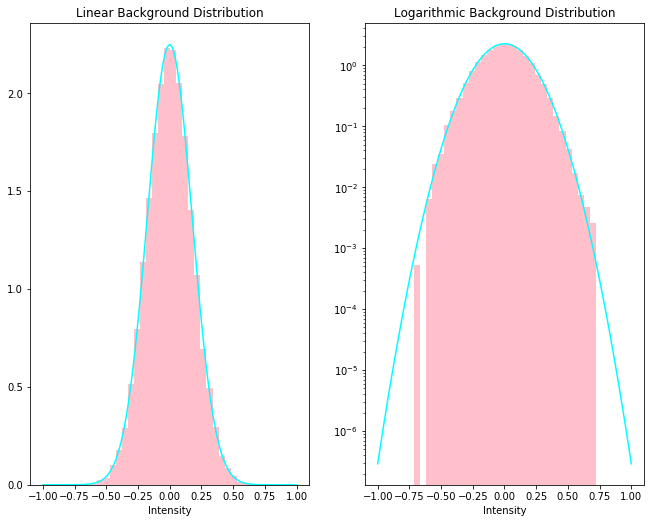

In [16]:
image_average = np.zeros([200, 200])
total_data = np.zeros(200*200)
for x in range(200):
    for y in range(200):
        average = np.average(image_stack[x,y,:])
        image_average[x,y] = average
        total_data[x*200 + y] = average

trimmed_data = []

for point in total_data:
    if point < 0.72 and point > -2.5:
        trimmed_data.append(point)  
            
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(11,8.5)

x = np.linspace(-1,1,1000)
ax[0].hist(trimmed_data, density=True, bins=30, color='pink')
ax[0].plot(x, stats.norm.pdf(x, scale=np.std(trimmed_data), loc=0), color='cyan')
ax[0].set_title('Linear Background Distribution')
ax[0].set_xlabel('Intensity')

ax[1].set_title('Logarithmic Background Distribution')
ax[1].set_xlabel('Intensity')
ax[1].set_yscale('log')
ax[1].hist(trimmed_data, density=True, bins=30, color='pink')
ax[1].plot(x, stats.norm.pdf(x, scale=np.std(trimmed_data), loc=0), color='cyan');

In [17]:
print("Standard Deviation:",np.std(trimmed_data))

Standard Deviation: 0.17755486102473308


The above two plots are the Background distribution of my images. The first one is a linear plot while the second logarithmic to better show how the tails act. This background distribution apears gaussian and has a standard deviation of 0.1775. I checked if the distribution is gaussian by plotting a gaussian created by scipy stats with a sigma of 0.1775 and location of 0. This is the cyan line, and this line seems to fit well with the histogram distribution. The only discrepancy is that my data has trimmed tails while the scipy distribution line does not.  

Now that I have a background distribution, I need to determine where and what the intensities of the stars are. I am going to define a star to have a singal intensity greater than 5-sigma (which is five times the above standard deviation). I chose this based off of the general significance level of discovery being 5-sigma. With this definition, I can compare each pixel's intensity to see if it is above 5-sigma, and thus a star.

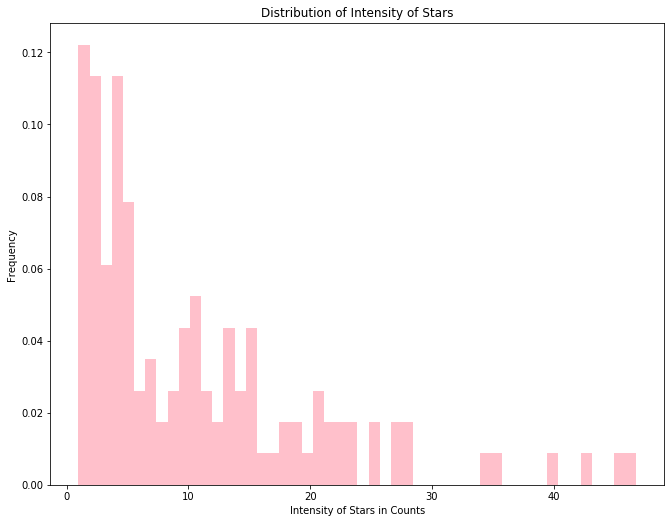

In [20]:
star_intensities = []
sigma= np.std(trimmed_data)
for x in range(200):
    for y in range(200):
        point = image_average[x, y]
        if point > 5*sigma:
            star_intensities.append(point)


fig, ax = plt.subplots(1, 1)
fig.set_size_inches(11,8.5)

ax.hist(star_intensities, bins=50, density=True, color='pink')
ax.set_ylabel('Frequency')
ax.set_xlabel('Intensity of Stars in Counts')
ax.set_title('Distribution of Intensity of Stars');

Now that I have gathered up all the stars, I need to define a cut off point for what counts as a "dim star." I am just going to look for the 10 dimmest stars, so if I sort the stars based on their intensity, and check the intensity of the star in the tenth index, I will have my maximum intensity cut-off .

In [21]:
star_intensities.sort()
print("Maximum Intensity Cut-off:", star_intensities[10])

Maximum Intensity Cut-off: 1.7002808500177853


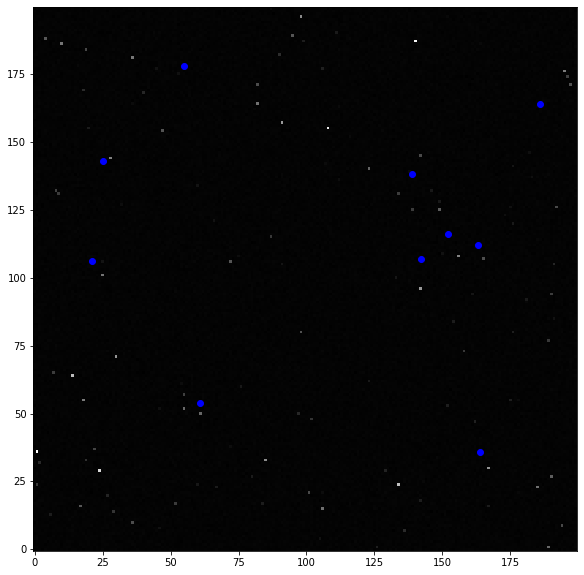

In [22]:
minimum = 5*0.17755486102473308
maximum = star_intensities[10]

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)

ax.imshow(image_average, cmap='gray',origin="bottom")

x_position = []
y_position = []
intensity  = []
for x in range(200):
    for y in range(200):
        point = image_average[x, y]
        if point > minimum and point < maximum:
            x_position.append(x)
            y_position.append(y)
            intensity.append(point)
            ax.plot(x, y, 'bo')


In [23]:
dimstar_table = pd.DataFrame(columns=['Star Intensity','Position X', 'Position Y'])
dimstar_table['Star Intensity'] = intensity
dimstar_table['Position X'] = x_position
dimstar_table['Position Y'] = y_position

dimstar_table

,Star Intensity,Position X,Position Y
0,1.621886,21,106
1,0.954607,25,143
2,1.437247,55,178
3,1.593499,61,54
4,1.397460,139,138
5,1.371735,142,107
6,1.161760,152,116
7,1.204673,163,112
8,1.344573,164,36
9,1.031946,186,164


Finally, I have gathered the dimmest stars of this field of view! The table above list the intensity and x&y position of all ten dimmest stars. The blue dots on the image above shows a better view of where my stars are located on the field of view.

While I have got the answer I was looking for, it is important to note that different questions lead to different probability distribution functions. In this example I was looking for the dimmest stars, and used a gaussian distribution. If I where looking for a something with a variable light curve, it would require a different pdf. Instead of comparing the counts of a star against the background, I would instead need to look at how much the counts change at a given position from one image to the next instead of just looking at the average of the counts at each position. 